Predicting Depression Levels Based on Reddit Content using NLP approach

Problem Statement: Can we accurately predict the level or likelihood of depression in a user based on the content they post across different subreddits?

Hypothesis: The language used by individuals in mental health-related subreddits (such as "Depression" and "SuicideWatch") contains specific linguistic markers that can be used to predict depressive symptoms.

Experiment Design: Use natural language processing (NLP) techniques to extract features from the Reddit posts, such as sentiment, linguistic patterns, word frequency, and topic modeling. Train a machine learning model (e.g., logistic regression, random forest, or deep learning model) to predict whether a post is indicative of depression.

Evaluation: Evaluate the model's accuracy using precision, recall, F1 score, and ROC-AUC metrics. Conduct a qualitative analysis of the most important features to understand which language patterns are most predictive.

Connections to the Humanities:
Linguistic Analysis: In the humanities, studying language is a key focus. By analyzing the language used in Reddit posts, you can explore how cultural and social factors shape the ways people express mental health issues. For example, language patterns can reveal how different groups articulate their experiences of depression, the metaphors they use, or the influence of cultural stigma on discussing mental health.

Cultural Studies: The expression of mental health issues online can be linked to cultural studies by examining how digital communities create shared meanings and norms around mental health. You could explore how different subreddits serve as cultural spaces where people come together to discuss their struggles, share advice, and form communities, thus producing and reproducing cultural attitudes toward mental health.

Connections to Cultural Production:
Digital Spaces as Sites of Cultural Production: Online forums like Reddit can be considered spaces where cultural production occurs. These spaces produce cultural narratives about mental health through shared stories, coping mechanisms, and expressions of emotional experiences. By predicting depression from posts, you are engaging with the content produced by users, which reflects broader cultural attitudes and discourses on mental health.

Role of Media in Shaping Cultural Norms: You could frame the project as an exploration of how online platforms influence cultural understandings of depression and mental health. This involves analyzing how language and content around mental health are shaped by the digital medium and how these cultural products (posts, stories, discussions) impact individuals' perceptions of mental well-being.

Potential Hypothesis with a Cultural Production Angle:
Hypothesis: "The language used in digital communities dedicated to mental health reflects broader cultural narratives about depression, and shifts in language patterns may indicate changes in cultural attitudes toward mental health over time."

Depression Definition:
Depression is a mood disorder that causes a persistent feeling of sadness and loss of interest [1].

In our Reddit Dataset from https://www.kaggle.com/datasets/rishabhkausish/reddit-depression-dataset/data, the reddit posts are classified as depression based solely on textual evidence and not clinical diagnosis. Identifying whethere the user is depressed based on their social media post is challenging because there is this question of "Who are you to say that this person is depressed?" Many people are skeptical of using AI to diagnose depression. I want to be clear that this project is not to be used for self-diagnosis, but rather to see the potential of NLP to classify depression with attention.


How a humanist use text?

- Identify similarity and differences between reddit posts 
- Track changes in content & style of posts over time
- compare text from different subreddits
- correlate posts with social events

In [1]:
#Imported modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("reddit_depression_dataset.csv")

df.sample(5)

/var/folders/_3/gf9nw0513z1c15l4qf8wly_c0000gn/T/ipykernel_50082/2269813919.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reddit_depression_dataset.csv")


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label
1915801,7668036,teenagers,Teens assemble,Doesn’t matter if you love him or you hate him...,6.0,1.656651e+09,24.0,0.0
1217811,4470104,teenagers,Some assholes in my neighborhood are still sho...,1. It’s almost mid night \n\n2. People have do...,6.0,1.593838e+09,6.0,0.0
1205875,4418920,teenagers,"For anyone interested in the Hunger Games, you...",It's set up like a text-based RPG where you c...,4.0,1.593097e+09,6.0,0.0
209541,1149828,teenagers,I talked to my crush so much at lunch that was...,Nobody cares I just wanted to tell y'all,5.0,1.516645e+09,9.0,0.0
792183,3023067,teenagers,I've just realized something.,The largest land animal is a beached whale.,7.0,1.572032e+09,3.0,0.0


Data Card:

Subreddit: The subreddit where the post was shared

Title: The title provided by the user for the post

Body: The content of the post written by the user

Upvotes: The number of upvotes the post received

Created UTC : The time the post was created, given in UTC epoch time

Number of Comments: The total count of comments on the post

Label: The category assigned to the post, where 0 indicates normal and 1 indicates depressed (Target)

In [3]:
df = df.rename(columns={"body": "content"}).drop("Unnamed: 0", axis = 1)
#axis = 1 is column
df.columns


Index(['subreddit', 'title', 'content', 'upvotes', 'created_utc',
       'num_comments', 'label'],
      dtype='object')

In [4]:
df['subreddit'].unique()

array(['DeepThoughts', 'teenagers', '15', '6', '30', '5', '12', '16', nan,
       '7', '4', '61', '10', '9', '8', '107', '11', 'happy',
       'SuicideWatch', '1402326041', 'depression', '31', '101', '27',
       '47'], dtype=object)

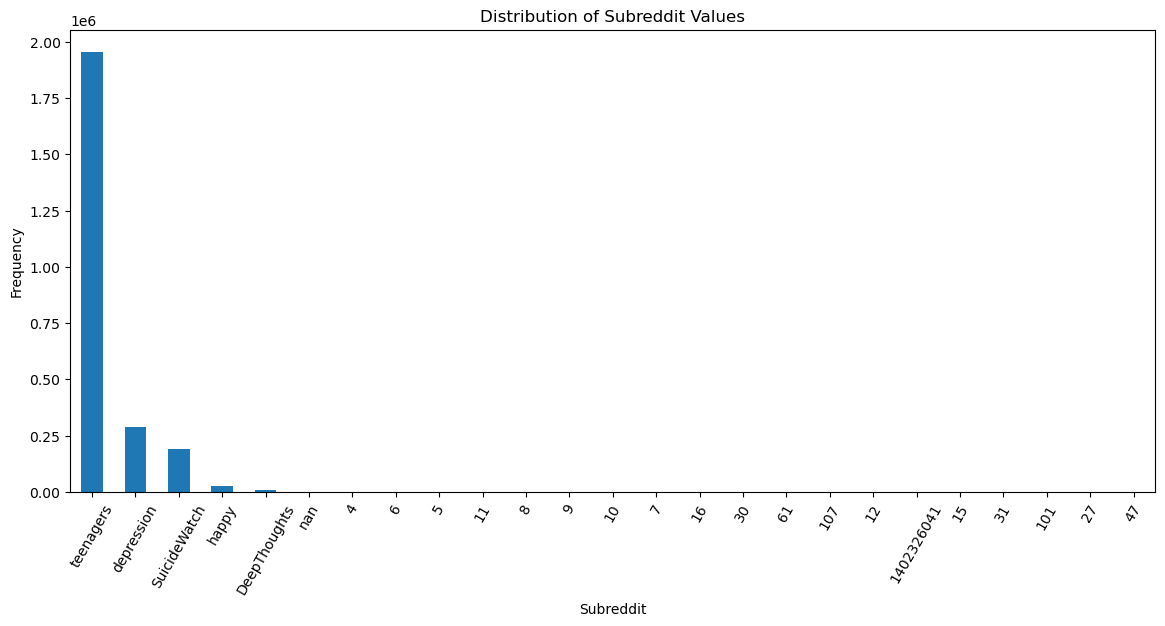

In [5]:
# Count the occurrences of each unique value
subreddit_counts = df['subreddit'].value_counts(dropna=False)

# Plot the distribution
plt.figure(figsize=(14, 6))
subreddit_counts.plot(kind='bar')
plt.title('Distribution of Subreddit Values')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')
plt.xticks(rotation=60) 
plt.show()

Observe that the dataset contains Reddit posts from 5 subreddits: DeepThoughts, teenagers, SuicideWatch, depression, and happy.

My prior is that we will most likely find more depression posts in SuicideWatch and depression. Happy will contain less language that relates to depression. I think posts from DeepThoughts and teenagers can expose languages that can be found in depressed posts.

In [6]:
# subreddits to keep
subreddits_to_keep = ['DeepThoughts', 'teenagers', 'SuicideWatch', 'depression', 'happy']

# Filter the DataFrame
filtered_df = df[df['subreddit'].isin(subreddits_to_keep) ]

# Reset index (optional)
filtered_df.reset_index(drop=True, inplace=True)

In [7]:
print(f'Number of entries in the dataset: {len(filtered_df)}')
print(f'Number of entries in each columns: \n{filtered_df.count()}')


Number of entries in the dataset: 2470715
Number of entries in each columns: 
subreddit       2470715
title           2470712
content         2009685
upvotes         2470672
created_utc     2470672
num_comments    2356801
label           2470672
dtype: int64


Some content are none. Instead of filtering data entries with "no content" we want to replace the data with a dummy content value like "no content" because many Reddit users expresses ideas in their post through the title with no content body.

In [27]:
# Filter rows where 'label' is 1
label_1_df = filtered_df[filtered_df['label'] == 1]

# Sample 10 rows from the filtered DataFrame
label_1_sample = label_1_df.sample(10)

# Get the 'content' column from the sampled rows
sampled_content = label_1_sample['content']

# Display one of the content values (for example, the first one)
print(sampled_content.iloc[3])



I keep looking at these pills, the lack of family or friends. Hell no one would even know til after the holidays? I know what they'll all say : he was a coward, he couldn't cut it ... Well, I couldn't. The PTSD, the divorce, the separation from my kids, the wife who found a new love, none of it. All of it is B.S., no one gives a **** unless it's making them feel better or they figure they'll buy there way into heaven. I'm so low I don't even try to reach out anymore, and no one cares too. I'm eating my favorite dishes and my favorite movie as I go to sleep.



References

1. Salik I, Marwaha R. StatPearls [Internet]. StatPearls Publishing; Treasure Island (FL): Sep 19, 2022. Electroconvulsive Therapy.